In [85]:
import numpy as np
import pandas as pd

In [86]:
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']
data = [['<21', 'High', 'Male', 'Single', 'No'],
        ['<21', 'High', 'Male', 'Married', 'No'],
        ['21-35', 'High', 'Male', 'Single', 'Yes'],
        ['>35', 'Medium', 'Male', 'Single', 'Yes'],
        ['>35', 'Low', 'Female', 'Single', 'Yes'],
        ['>35', 'Low', 'Female', 'Married', 'No'],
        ['21-35', 'Low', 'Female', 'Married', 'Yes'],
        ['<21', 'Medium', 'Male', 'Single', 'No'],
        ['<21', 'Low', 'Female', 'Married', 'Yes'],
        ['>35', 'Medium', 'Female', 'Single', 'Yes'],
        ['<21', 'Medium', 'Female', 'Married', 'Yes'],
        ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
        ['21-35', 'High', 'Female', 'Single', 'Yes'],
        ['>35', 'Medium', 'Male', 'Married', 'No']
        ]
df = pd.DataFrame(columns=columns, data=data)

In [87]:
df.value_counts()

Age    Income  Gender  Marital Status  Buys
21-35  High    Female  Single          Yes     1
               Male    Single          Yes     1
       Low     Female  Married         Yes     1
       Medium  Male    Married         Yes     1
<21    High    Male    Married         No      1
                       Single          No      1
       Low     Female  Married         Yes     1
       Medium  Female  Married         Yes     1
               Male    Single          No      1
>35    Low     Female  Married         No      1
                       Single          Yes     1
       Medium  Female  Single          Yes     1
               Male    Married         No      1
                       Single          Yes     1
dtype: int64

In [88]:
df['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [34]:
class Node:
    def __init__(self, attr: str, defi : bool, out = None):
        self.attr = attr
        self.defi = defi
        self.out = out
            
    def getOutput(self, input):
        if self.defi:
            return self.out
#         elif type(self.out[input[self.attr]]) != type(self):
#             return self.out[input[self.attr]]
        return self.out[input[self.attr]].getOutput(input)
    
    def __str__(self):
        return f'DEFI : {self.defi}  OUTPUT : {self.out}'
        

In [35]:
class DecisionTree:
    def __init__(self, df, target: str):
        self.df = df
        self.target = target

    def __GiniIndex(self, df, colName):
        tot = len(df[self.target])
        unique_outputs = df[self.target].unique()
        uniqueVals = df[colName].value_counts()
        giniArr = {}
        for i in uniqueVals.keys():
            giniInd = 1
            for j in unique_outputs:
                t = df[df[colName] == i]
                t = t[t[self.target] == j]
                t = len(t[self.target])
                giniInd -= (t/uniqueVals[i])**2
                giniArr[i] = giniInd
        gini_final = 0
        for i in giniArr:
            gini_final += (uniqueVals[i]/tot)*giniArr[i]
        
        return gini_final
    
    def __getAllGini(self,df):
        giniDict = {}
        for i in df.columns:
            if i != self.target:
                giniDict[i] = self.__GiniIndex(df,i)
#         print(giniDict)
        return giniDict
    
    def BuildTree(self,df):
        giniDict = self.__getAllGini(df)
        col = min(giniDict, key = giniDict.get)
        uniqueVals = df[col].unique()
        isTargetUnique = len(df[self.target].unique()) == 1
        if isTargetUnique:
            defi = True
            out = df[self.target].unique()[0]
            return Node(col, defi, out)
        elif len(df.columns) == 2:
            defi = True
            out = df[self.target].value_counts().idxmax()
            return Node(col, defi, out)
        else:
            defi = False
            out_Map = {}
            for i in uniqueVals:
                sub_df = df[df[col] == i]
                sub_df = sub_df.drop(columns=[col], axis = 1)
                out_Map[i] = self.BuildTree(sub_df)
                
            return Node(col, defi, out_Map)

In [36]:
dt = DecisionTree(df, 'Buys')
root = dt.BuildTree(df)

In [37]:
print(str(root))

DEFI : False  OUTPUT : {'<21': <__main__.Node object at 0x00000235514496A0>, '21-35': <__main__.Node object at 0x00000235514D99A0>, '>35': <__main__.Node object at 0x00000235514A4FA0>}


In [38]:
root.getOutput({'Age':'<21', 'Income':'Low','Gender':'Female','Marital Status':'Married'})

'Yes'

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df =df.apply(lb.fit_transform)

AttributeError: 'LabelEncoder' object has no attribute 'feature_names_in_'

In [58]:
df

,Age,Income,Gender,Marital Status,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [59]:
y = df['Buys']
X = df.drop(['Buys'],axis=1)


model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [73]:
test .iloc[7:8]
test


,Age,Income,Gender,Marital Status,Buys
7,1,2,1,1,0


In [74]:
 preds = model.predict(test)

In [76]:
preds[0]

0

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

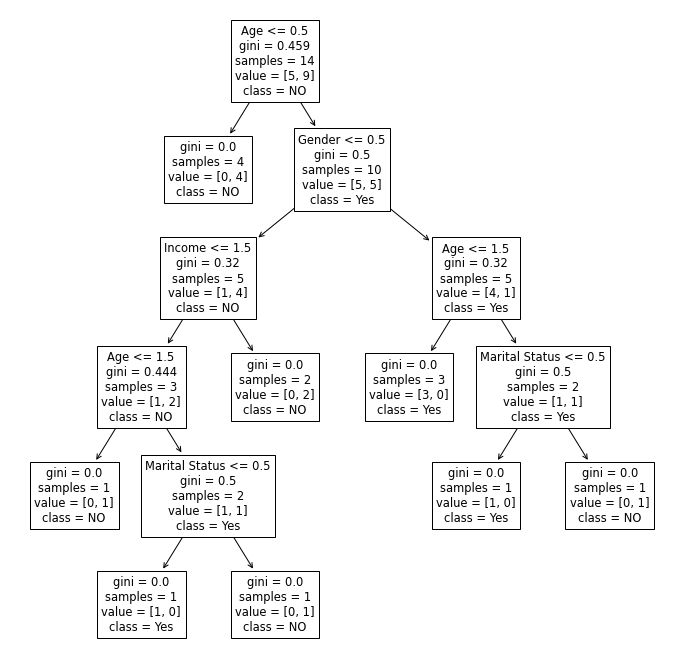

In [83]:
plt.figure(figsize=(12,12))
pt = plot_tree(model,feature_names=X.columns,class_names=['Yes','NO'])
plt.show()